In [59]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [60]:
# Read the CSV file
df =  pd.read_csv("Unicorn_Companies.csv")
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [61]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [62]:
# Finding missing values and number of nulls

df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [63]:
# Dropping rows with missing values
df.dropna(inplace = True)

In [64]:
# check non-numerical values in Funding column 
df["Funding"].value_counts()

$1B        59
$2B        29
$200M      12
Unknown    12
$4B         9
           ..
$536M       1
$19M        1
$946M       1
$180M       1
$620M       1
Name: Funding, Length: 533, dtype: int64

In [65]:
# check non-numerical values in Valuation column 
df["Valuation"].value_counts()

$1B      461
$2B      246
$3B      112
$4B       71
$5B       40
$6B       26
$7B       18
$10B      15
$8B       13
$9B       10
$12B      10
$11B       7
$13B       4
$15B       4
$100B      2
$20B       2
$38B       2
$40B       2
$17B       1
$14B       1
$18B       1
$22B       1
$25B       1
$27B       1
$32B       1
$33B       1
$39B       1
$46B       1
$95B       1
$180B      1
Name: Valuation, dtype: int64

In [66]:
 # Dropping rows with "Unknown" in Funding column

df = df[df["Funding"] != "Unknown"]

In [67]:
df["Funding"].value_counts()

$1B      59
$2B      29
$200M    12
$4B       9
$3B       7
         ..
$536M     1
$19M      1
$946M     1
$180M     1
$620M     1
Name: Funding, Length: 532, dtype: int64

In [68]:
df["Industry"].value_counts(normalize=True)*100

Fintech                                20.669856
Internet software & services           19.234450
E-commerce & direct-to-consumer        10.047847
Health                                  7.081340
Artificial intelligence                 6.794258
Other                                   5.358852
Supply chain, logistics, & delivery     5.263158
Cybersecurity                           4.784689
Data management & analytics             3.827751
Mobile & telecommunications             3.349282
Hardware                                3.253589
Auto & transportation                   2.966507
Edtech                                  2.679426
Consumer & retail                       2.296651
Travel                                  1.339713
Artificial Intelligence                 1.052632
Name: Industry, dtype: float64

In [69]:
df["City"].value_counts(normalize=True)*100


San Francisco    14.545455
New York          9.760766
Beijing           5.933014
Shanghai          4.019139
London            3.253589
                   ...    
Lysaker           0.095694
Richmond          0.095694
Santa Barbara     0.095694
Altrincham        0.095694
Milpitas          0.095694
Name: City, Length: 253, dtype: float64

In [70]:
df["Country"].value_counts(normalize=True)*100


United States           53.110048
China                   16.172249
India                    6.220096
United Kingdom           4.114833
Germany                  2.488038
France                   2.200957
Israel                   1.913876
Canada                   1.722488
Brazil                   1.531100
South Korea              1.148325
Australia                0.765550
Mexico                   0.574163
Netherlands              0.574163
Indonesia                0.574163
Sweden                   0.574163
Switzerland              0.478469
Japan                    0.478469
Ireland                  0.478469
Norway                   0.382775
Finland                  0.382775
Spain                    0.287081
Belgium                  0.287081
Turkey                   0.287081
United Arab Emirates     0.287081
Hong Kong                0.287081
Thailand                 0.191388
Chile                    0.191388
Philippines              0.191388
Estonia                  0.191388
South Africa  

In [71]:
df["Company"].value_counts()


Bolt            2
Bytedance       1
Yotpo           1
Koudai          1
Panther Labs    1
               ..
Carzone         1
CFGI            1
Cgtz            1
Changingedu     1
Zwift           1
Name: Company, Length: 1044, dtype: int64

In [72]:
# Seeing the duplicate company
df[df["Company"] == "Bolt"]


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
40,Bolt,$11B,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,$1B,"Didi Chuxing, Diamler, TMT Investments"
44,Bolt,$11B,2021-10-08,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic"


In [73]:
df['Year Founded'].value_counts(normalize=True)*100


2015    14.354067
2016    10.430622
2014    10.239234
2012     8.899522
2013     8.038278
2011     7.751196
2017     6.985646
2018     5.645933
2019     4.019139
2010     3.636364
2009     3.253589
2008     2.583732
2007     2.200957
2020     2.200957
2006     1.435407
2005     1.339713
2021     1.052632
2000     1.052632
1999     0.765550
2004     0.765550
2001     0.669856
2003     0.669856
1998     0.478469
2002     0.287081
1995     0.191388
1994     0.191388
1991     0.095694
1993     0.095694
1984     0.095694
1990     0.095694
1996     0.095694
1992     0.095694
1979     0.095694
1919     0.095694
1997     0.095694
Name: Year Founded, dtype: float64

In [74]:
df['Select Investors'].value_counts(normalize=True)*100


Two Sigma Ventures, Flint Capital, Commerce Ventures                                     0.191388
Greylock Partners, Google Ventures, BlackRock                                            0.191388
General Atlantic                                                                         0.191388
Sequoia Capital                                                                          0.191388
Qualcomm Ventures, Accel, Canaan Partners                                                0.191388
                                                                                           ...   
Guozhong Venture Capital Management, Shenzhen Capital Group, Oriental Fortune Capital    0.095694
DeFi Technologies, Hypersphere Ventures, M13                                             0.095694
Octopus Ventures, Munich Re Ventures, CommerzVentures                                    0.095694
Alibaba Group,Co-Stone Venture Capital, Buhuo Venture Capital                            0.095694
Novator Partners, Tr

In [75]:
# Replace intelligence with Intelligence in Industry column

df.Industry = df.Industry.str.replace("intelligence", "Intelligence")

In [76]:
# Replace the duplicated company names
df.loc[40,"Company"] = 'Bolt (Estonia)'
df.loc[44,"Company"] = 'Bolt (United States)'

In [77]:
df = df.head(5)


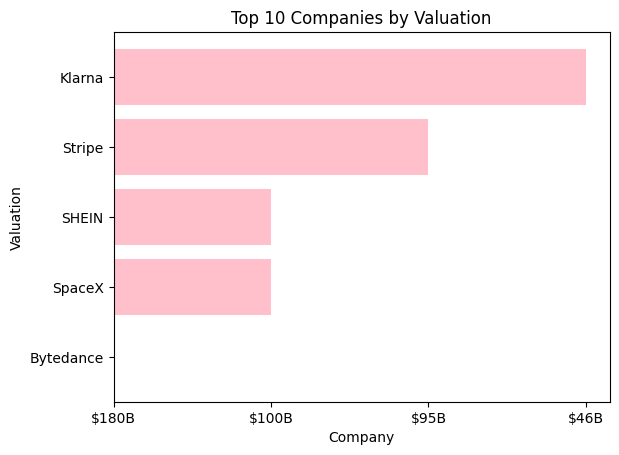

In [78]:
# Create the bar chart
plt.barh(df['Company'], df['Valuation'], color='pink')


plt.title('Top 10 Companies by Valuation')
plt.xlabel('Company')
plt.ylabel('Valuation')


plt.show()

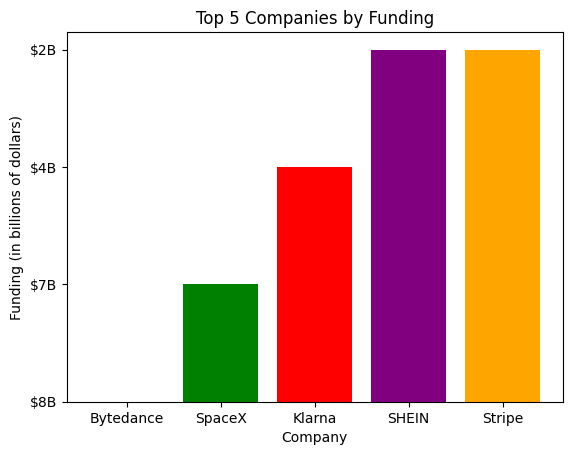

In [84]:
# Sort the dataframe by funding in descending order
df = df.sort_values('Funding', ascending=False)

# Define a list of colors for the bars
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the bar chart
plt.bar(df['Company'], df['Funding'], color=colors)

# Customize the chart
plt.title('Top 5 Companies by Funding')
plt.xlabel('Company')
plt.ylabel('Funding (in billions of dollars)')

# Show the chart
plt.show()